In [1]:
import os

In [2]:
from collections import Counter
from pathlib import Path
import json
import os
import re
import shutil

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skimage
import seaborn as sns
import tifffile
from tifffile import TiffFile
from ome_types import from_xml, from_tiff

In [20]:
# sid = '20260818_BONE_IRD_Slide_1'
# geojson_fp = '/diskmnt/Projects/myeloma_scRNA_analysis/MMY_IRD/analysis/CODEX/Run_08182026/slide1_sample_objects.geojson'


sid = '20260818_BONE_IRD_Slide_2'
geojson_fp = '/diskmnt/Projects/myeloma_scRNA_analysis/MMY_IRD/analysis/CODEX/Run_08182026/slide2_sample_objects.geojson'


In [21]:

cell_fp = f'../../data/julia_ird/{sid}_spatial_features.txt'
img_fp = f'../../data/julia_ird/{sid}.ome.tiff'

In [22]:
tf = tifffile.TiffFile(img_fp)
o = from_tiff(img_fp)
o

OME(
   images=[<1 field_type>],
   structured_annotations={'xml_annotations': [], 'file_annotations': [], 'list_annotations': [], 'long_annotations': [], 'double_annotations': [], 'comment_annotations': [], 'boolean_annotations': [], 'timestamp_annotations': [], 'tag_annotations': [], 'term_annotations': [], 'map_annotations': []},
)

In [23]:
pixels = o.images[0].pixels
w, h = pixels.size_x, pixels.size_y
w, h

(35520, 61920)

In [24]:
cell_df = pd.read_csv(cell_fp, sep='\t')
cell_df

,label,row,col,bbox-r1,bbox-c1,bbox-r2,bbox-c2,area,BAFF_fraction,BAFF_intensity,...,TIM3_fraction,TIM3_intensity,TIM3_intensity_scaled,Vimentin_fraction,Vimentin_intensity,Vimentin_intensity_scaled,cKit_fraction,cKit_intensity,cKit_intensity_scaled,cell_type
0,1,8.391556,1101.639676,0,1038,21,1152,1729.0,0.001735,0.045691,...,0.080393,7.342394,0.426577,0.000000,0.131290,0.002282,0.001157,0.066512,0.020073,Unlabeled
1,2,7.421984,1296.865952,0,1216,21,1356,1865.0,0.000000,0.049866,...,0.228418,7.866488,0.457025,0.000000,0.144236,0.002507,0.002681,0.085255,0.025729,Unlabeled
2,3,6.396509,1475.097257,0,1405,16,1534,1604.0,0.001247,0.038653,...,0.140898,7.625935,0.443050,0.000000,0.130923,0.002275,0.001870,0.071072,0.021449,Unlabeled
3,4,5.749491,1668.352342,0,1597,14,1728,1473.0,0.001358,0.054311,...,0.174474,7.752206,0.450386,0.000000,0.141887,0.002466,0.002716,0.093007,0.028069,Immune
4,5,5.658020,1860.447099,0,1789,14,1920,1465.0,0.000683,0.049147,...,0.232765,7.921502,0.460222,0.000000,0.141297,0.002456,0.004096,0.095563,0.028840,Immune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739291,739292,61116.799020,28359.992647,61108,28345,61127,28374,408.0,0.046569,0.411765,...,0.186275,4.367647,0.253751,0.794118,128.698529,2.236577,0.524510,1.546569,0.466740,Unlabeled
739292,739293,61139.456712,28342.873116,61113,28293,61160,28393,2853.0,0.045566,0.202243,...,0.046618,5.253768,0.305232,0.155275,34.903260,0.606563,0.089730,0.471083,0.142169,Unlabeled
739293,739294,61173.604724,28698.616273,61136,28671,61221,28731,1905.0,0.076640,0.282940,...,0.110761,6.129659,0.356119,0.092913,11.920210,0.207154,0.120735,0.664567,0.200560,Macrophage - M1
739294,739295,61344.821346,28136.317865,61319,28120,61371,28152,1293.0,0.030162,0.157773,...,0.044857,5.039443,0.292780,0.269915,62.884764,1.092838,0.048724,0.281516,0.084959,Unlabeled


In [25]:
import json

d = json.load(open(geojson_fp))

In [26]:
regions = d['features']
coords = []
for x in regions:
    print(x['id'])
    try:
        coords.append(np.asarray(x['geometry']['coordinates']))
    except ValueError:
        print(x['id'], 'failed')
        coords.append(None)

df25ab82-546b-4db1-aaa1-a260674811f8
5dd812a4-b8b9-4620-916c-6c58b1edf684
ee701f3b-34e8-4daf-8b70-a506a6c117c1
212a8de4-d4f3-461a-ba6a-bb5a6c054cb2
0e56ba38-e429-4550-84bc-738f316a8037
c521c500-bef4-4de4-83bd-25397ccc8b42
8f9f83df-3db4-42d8-9231-b4c0f1c213eb
28bf89a4-6613-4884-9fd9-47331fa255b7
ffeb1718-21ff-4bbf-8de1-f07e6f5190b6


In [27]:
regions = [{
    'id': x['id'],
    'coordinates': coords[i],
    'label': x['properties']['classification']['name'],
} for i, x in enumerate(regions) if coords[i] is not None]

In [28]:
regions = [x for x in regions if len(x['coordinates'].shape) == 3]
for x in regions:
    print(x['id'])
    x['coordinates'] = x['coordinates'][0][:, [1, 0]] # switch to y, x
    x['mask'] = skimage.draw.polygon2mask((h, w), x['coordinates'])

df25ab82-546b-4db1-aaa1-a260674811f8
5dd812a4-b8b9-4620-916c-6c58b1edf684
ee701f3b-34e8-4daf-8b70-a506a6c117c1
212a8de4-d4f3-461a-ba6a-bb5a6c054cb2
0e56ba38-e429-4550-84bc-738f316a8037
c521c500-bef4-4de4-83bd-25397ccc8b42
8f9f83df-3db4-42d8-9231-b4c0f1c213eb
28bf89a4-6613-4884-9fd9-47331fa255b7
ffeb1718-21ff-4bbf-8de1-f07e6f5190b6


In [29]:
x = regions[0]
x

{'id': 'df25ab82-546b-4db1-aaa1-a260674811f8',
 'coordinates': array([[43300, 23345],
        [43592, 21301],
        [46805, 20279],
        [48484, 21374],
        [53668, 20644],
        [56297, 20717],
        [56516, 21958],
        [54983, 26193],
        [52938, 27654],
        [49871, 30501],
        [47389, 33787],
        [47316, 33787],
        [44322, 33057],
        [44176, 28822],
        [43592, 26412],
        [43300, 23345]]),
 'label': 'SN227',
 'mask': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

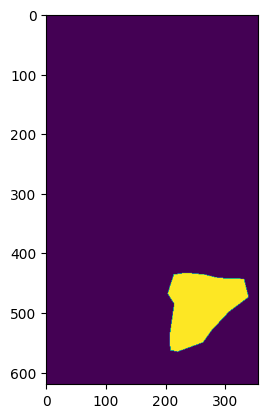

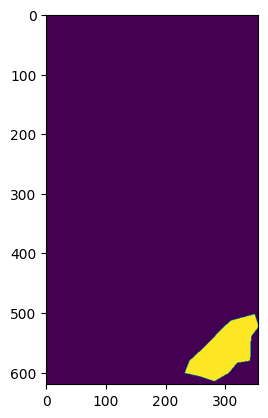

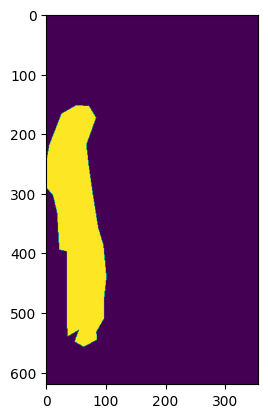

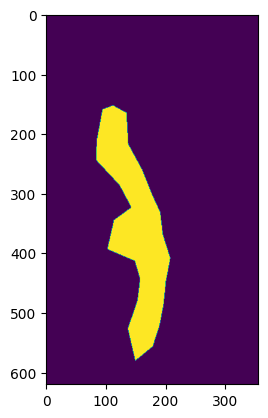

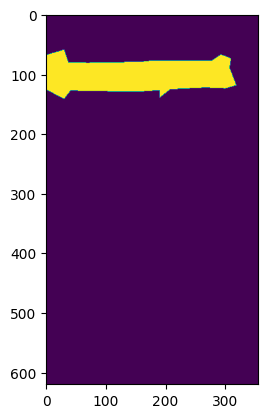

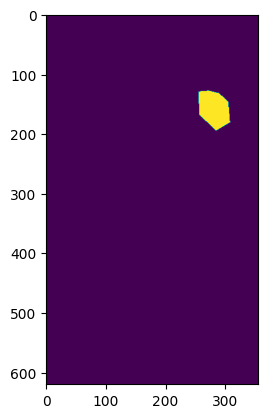

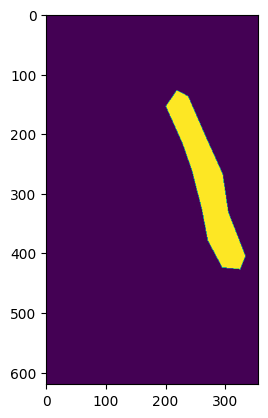

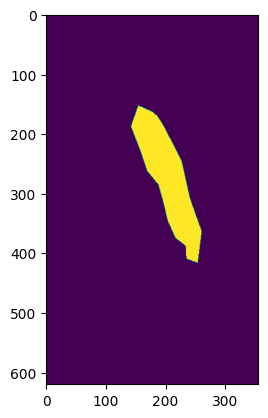

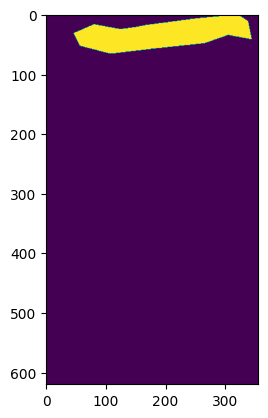

In [30]:
for x in regions:
    plt.imshow(x['mask'][::100, ::100])
    plt.show()

In [31]:
xs, ys = cell_df['col'].values.astype(int), cell_df['row'].values.astype(int)

sids = np.full((cell_df.shape[0],), None, dtype=object)
for x in regions:
    mask = x['mask'][ys, xs]
    sids[mask] = x['label']
sids
    

array([None, None, None, ..., None, 'SN224', None], dtype=object)

In [32]:
cell_df.insert(1, 'section_id', sids)
cell_df

,label,section_id,row,col,bbox-r1,bbox-c1,bbox-r2,bbox-c2,area,BAFF_fraction,...,TIM3_fraction,TIM3_intensity,TIM3_intensity_scaled,Vimentin_fraction,Vimentin_intensity,Vimentin_intensity_scaled,cKit_fraction,cKit_intensity,cKit_intensity_scaled,cell_type
0,1,None,8.391556,1101.639676,0,1038,21,1152,1729.0,0.001735,...,0.080393,7.342394,0.426577,0.000000,0.131290,0.002282,0.001157,0.066512,0.020073,Unlabeled
1,2,None,7.421984,1296.865952,0,1216,21,1356,1865.0,0.000000,...,0.228418,7.866488,0.457025,0.000000,0.144236,0.002507,0.002681,0.085255,0.025729,Unlabeled
2,3,None,6.396509,1475.097257,0,1405,16,1534,1604.0,0.001247,...,0.140898,7.625935,0.443050,0.000000,0.130923,0.002275,0.001870,0.071072,0.021449,Unlabeled
3,4,None,5.749491,1668.352342,0,1597,14,1728,1473.0,0.001358,...,0.174474,7.752206,0.450386,0.000000,0.141887,0.002466,0.002716,0.093007,0.028069,Immune
4,5,None,5.658020,1860.447099,0,1789,14,1920,1465.0,0.000683,...,0.232765,7.921502,0.460222,0.000000,0.141297,0.002456,0.004096,0.095563,0.028840,Immune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739291,739292,SN224,61116.799020,28359.992647,61108,28345,61127,28374,408.0,0.046569,...,0.186275,4.367647,0.253751,0.794118,128.698529,2.236577,0.524510,1.546569,0.466740,Unlabeled
739292,739293,SN224,61139.456712,28342.873116,61113,28293,61160,28393,2853.0,0.045566,...,0.046618,5.253768,0.305232,0.155275,34.903260,0.606563,0.089730,0.471083,0.142169,Unlabeled
739293,739294,None,61173.604724,28698.616273,61136,28671,61221,28731,1905.0,0.076640,...,0.110761,6.129659,0.356119,0.092913,11.920210,0.207154,0.120735,0.664567,0.200560,Macrophage - M1
739294,739295,SN224,61344.821346,28136.317865,61319,28120,61371,28152,1293.0,0.030162,...,0.044857,5.039443,0.292780,0.269915,62.884764,1.092838,0.048724,0.281516,0.084959,Unlabeled


In [33]:
cols = ['label', 'section_id', 'row', 'col', 'area']
cols += [c for c in cell_df.columns if 'intensity' in c]
output_df = cell_df[cols]
output_df

,label,section_id,row,col,area,BAFF_intensity,BAFF_intensity_scaled,Bcl-2_intensity,Bcl-2_intensity_scaled,CCR6_intensity,...,TACI_intensity,TACI_intensity_scaled,TGFB1_intensity,TGFB1_intensity_scaled,TIM3_intensity,TIM3_intensity_scaled,Vimentin_intensity,Vimentin_intensity_scaled,cKit_intensity,cKit_intensity_scaled
0,1,None,8.391556,1101.639676,1729.0,0.045691,0.019556,0.419318,0.015189,0.855986,...,0.293811,0.038442,3.348757,0.439882,7.342394,0.426577,0.131290,0.002282,0.066512,0.020073
1,2,None,7.421984,1296.865952,1865.0,0.049866,0.021343,0.436461,0.015810,0.849866,...,0.339946,0.044479,3.819303,0.501692,7.866488,0.457025,0.144236,0.002507,0.085255,0.025729
2,3,None,6.396509,1475.097257,1604.0,0.038653,0.016544,0.496259,0.017976,0.876559,...,0.363466,0.047556,3.567955,0.468675,7.625935,0.443050,0.130923,0.002275,0.071072,0.021449
3,4,None,5.749491,1668.352342,1473.0,0.054311,0.023246,0.438561,0.015886,0.794297,...,0.475900,0.062267,3.604888,0.473527,7.752206,0.450386,0.141887,0.002466,0.093007,0.028069
4,5,None,5.658020,1860.447099,1465.0,0.049147,0.021035,0.470307,0.017036,0.769283,...,0.526280,0.068859,3.727645,0.489652,7.921502,0.460222,0.141297,0.002456,0.095563,0.028840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739291,739292,SN224,61116.799020,28359.992647,408.0,0.411765,0.176240,6.786765,0.245833,0.002451,...,0.250000,0.032710,1.066176,0.140050,4.367647,0.253751,128.698529,2.236577,1.546569,0.466740
739292,739293,SN224,61139.456712,28342.873116,2853.0,0.202243,0.086562,1.262180,0.045719,0.168945,...,0.200841,0.026278,1.415352,0.185916,5.253768,0.305232,34.903260,0.606563,0.471083,0.142169
739293,739294,None,61173.604724,28698.616273,1905.0,0.282940,0.121101,2.808924,0.101746,0.201050,...,2.766404,0.361958,1.739108,0.228444,6.129659,0.356119,11.920210,0.207154,0.664567,0.200560
739294,739295,SN224,61344.821346,28136.317865,1293.0,0.157773,0.067528,1.662026,0.060203,0.163186,...,0.363496,0.047560,1.073473,0.141008,5.039443,0.292780,62.884764,1.092838,0.281516,0.084959


In [34]:
output_df = output_df[~pd.isnull(output_df['section_id'])]
output_df

,label,section_id,row,col,area,BAFF_intensity,BAFF_intensity_scaled,Bcl-2_intensity,Bcl-2_intensity_scaled,CCR6_intensity,...,TACI_intensity,TACI_intensity_scaled,TGFB1_intensity,TGFB1_intensity_scaled,TIM3_intensity,TIM3_intensity_scaled,Vimentin_intensity,Vimentin_intensity_scaled,cKit_intensity,cKit_intensity_scaled
84,85,WU068_NDMM_S16-34821,804.485849,31507.283019,212.0,1.533019,0.656149,16.141509,0.584685,0.400943,...,3.915094,0.512253,8.773585,1.152471,19.363208,1.124959,151.811321,2.638240,2.919811,0.881173
90,91,WU068_NDMM_S16-34821,816.860465,31509.691860,172.0,1.465116,0.627086,13.755814,0.498269,0.267442,...,2.726744,0.356769,7.866279,1.033290,17.720930,1.029546,52.633721,0.914691,2.738372,0.826416
91,92,WU068_NDMM_S16-34821,818.005291,31527.343915,189.0,1.026455,0.439334,8.343915,0.302237,0.179894,...,2.158730,0.282450,6.507937,0.854862,15.365079,0.892677,23.153439,0.402370,1.820106,0.549291
97,98,WU068_NDMM_S16-34821,824.165746,31483.337017,181.0,0.430939,0.184447,2.939227,0.106466,0.480663,...,4.850829,0.634685,5.491713,0.721374,11.215470,0.651594,4.524862,0.078635,0.955801,0.288452
102,103,WU068_NDMM_S16-34821,829.098446,31469.968912,193.0,1.316062,0.563289,10.829016,0.392254,0.595855,...,8.165803,1.068419,7.606218,0.999129,15.740933,0.914513,11.492228,0.199717,2.632124,0.794351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739289,739290,SN224,61128.264556,28460.934627,979.0,0.033708,0.014427,9.370787,0.339433,0.009193,...,0.056180,0.007351,0.376915,0.049510,2.072523,0.120409,146.041879,2.537977,0.588355,0.177560
739290,739291,SN224,61115.670330,28315.413919,273.0,2.289377,0.979878,10.150183,0.367665,0.025641,...,0.589744,0.077162,4.135531,0.543230,12.040293,0.699514,154.721612,2.688817,4.454212,1.344241
739291,739292,SN224,61116.799020,28359.992647,408.0,0.411765,0.176240,6.786765,0.245833,0.002451,...,0.250000,0.032710,1.066176,0.140050,4.367647,0.253751,128.698529,2.236577,1.546569,0.466740
739292,739293,SN224,61139.456712,28342.873116,2853.0,0.202243,0.086562,1.262180,0.045719,0.168945,...,0.200841,0.026278,1.415352,0.185916,5.253768,0.305232,34.903260,0.606563,0.471083,0.142169


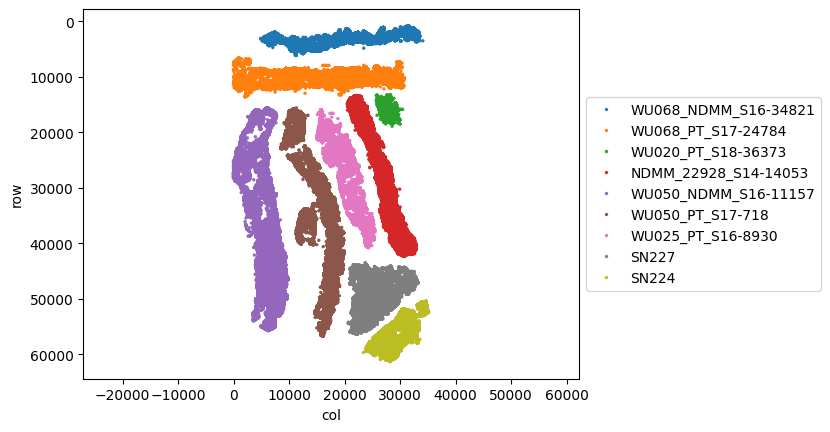

In [35]:
sns.scatterplot(output_df, x='col', y='row', hue='section_id', s=5, edgecolors=None)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [36]:
output_df.to_csv(f'../../data/julia_ird/{sid}_spatial_features_sample_annotated.txt', sep='\t', index=False)